### The Delta Rule

In [54]:
%run common.ipynb
from vector import *
from boolean import *
from activation_function import *
from perceptron import *


   #### Delta Rule Implementation

In [55]:
# %load delta_rule.py
import random
from vector import dotprod


def delta_rule(T, a, da, s=0.01, epochs=50):
    n = len(T[0])
    w, b = n * (random.random(),), random.random()
    for _ in range(epochs):
        for x, y in T:
            z = dotprod(w, x) + b
            az, daz = a(z), da(z)
            d = y - az
            w = tuple(w[i] + s * d * daz * x[i] for i in range(n))
            b = b + s * d * daz
    return w, b


In [56]:
def delta_rule_approx(T, a, da, s=0.01, epochs=50):
    w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
    return lambda x: dotprod(w, x) + b


def run_delta_rule(f, T, a, da, fire, s=0.01, epochs=50):
    r = delta_rule_approx(T, a, da, s=s, epochs=epochs)
    p = lambda x: fire(r(x))
    if all(p(x) == y for x, y in T):
        print(f"{f.__name__}: ok")
    else:
        print(_red(f"{f.__name__}: failed"))
    for x, y in T:
        z = p(x)
        if z == y:
            print(f"    {f.__name__}{x} = {y}	a(wx+b) = {_rnd(a(r(x)), n=2)}")
        else:
            print(_red(f"    {f.__name__}{x} = {y} ≠ {z}	a(wx+b) = {_rnd(a(r(x)), n=2)}"))


#### Approximation of Boolean Operators

In [57]:
s, epochs = 0.01, 2500
for f, T in BOOLEAN_TESTDATA.items():
    run_delta_rule(f, T, a=sigmoid, da=dx_sigmoid, fire=heaviside, s=s, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = 0.11
    AND(0, 1) = 0	a(wx+b) = 0.3
    AND(1, 0) = 0	a(wx+b) = 0.3
    AND(1, 1) = 1	a(wx+b) = 0.6
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.43
    OR(0, 1) = 1	a(wx+b) = 0.78
    OR(1, 0) = 1	a(wx+b) = 0.78
    OR(1, 1) = 1	a(wx+b) = 0.95
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.56
    NAND(0, 1) = 0	a(wx+b) = 0.22
    NAND(1, 0) = 0	a(wx+b) = 0.22
    NAND(1, 1) = 0	a(wx+b) = 0.06
XOR: failed
    XOR(0, 0) = 0 ≠ 1	a(wx+b) = 0.51
    XOR(0, 1) = 1	a(wx+b) = 0.5
    XOR(1, 0) = 1	a(wx+b) = 0.5
    XOR(1, 1) = 0	a(wx+b) = 0.5


In [58]:
s, epochs = 0.01, 500
r = 10.0 * random.random()
for f, T in BOOLEAN_TESTDATA.items():
    a = lambda x: linear(x, a=r)
    da = lambda x: dx_linear(x, a=r)
    run_delta_rule(f, T, a=linear, da=dx_linear, fire=step, s=s, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = -0.22
    AND(0, 1) = 0	a(wx+b) = 0.26
    AND(1, 0) = 0	a(wx+b) = 0.26
    AND(1, 1) = 1	a(wx+b) = 0.73
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.26
    OR(0, 1) = 1	a(wx+b) = 0.75
    OR(1, 0) = 1	a(wx+b) = 0.75
    OR(1, 1) = 1	a(wx+b) = 1.24
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.72
    NAND(0, 1) = 0	a(wx+b) = 0.25
    NAND(1, 0) = 0	a(wx+b) = 0.25
    NAND(1, 1) = 0	a(wx+b) = -0.23
XOR: failed
    XOR(0, 0) = 0	a(wx+b) = 0.48
    XOR(0, 1) = 1 ≠ 0	a(wx+b) = 0.5
    XOR(1, 0) = 1 ≠ 0	a(wx+b) = 0.49
    XOR(1, 1) = 0 ≠ 1	a(wx+b) = 0.51


In [59]:
s, epochs = 0.01, 500
for f, T in BOOLEAN_TESTDATA.items():
    run_delta_rule(f, T, a=tanh, da=dx_tanh, fire=step, s=s, epochs=epochs)


AND: ok
    AND(0, 0) = 0	a(wx+b) = -0.24
    AND(0, 1) = 0	a(wx+b) = 0.24
    AND(1, 0) = 0	a(wx+b) = 0.24
    AND(1, 1) = 1	a(wx+b) = 0.63
OR: ok
    OR(0, 0) = 0	a(wx+b) = 0.17
    OR(0, 1) = 1	a(wx+b) = 0.81
    OR(1, 0) = 1	a(wx+b) = 0.81
    OR(1, 1) = 1	a(wx+b) = 0.97
NAND: ok
    NAND(0, 0) = 1	a(wx+b) = 0.56
    NAND(0, 1) = 0	a(wx+b) = 0.22
    NAND(1, 0) = 0	a(wx+b) = 0.22
    NAND(1, 1) = 0	a(wx+b) = -0.17
XOR: failed
    XOR(0, 0) = 0	a(wx+b) = 0.45
    XOR(0, 1) = 1	a(wx+b) = 0.5
    XOR(1, 0) = 1	a(wx+b) = 0.5
    XOR(1, 1) = 0 ≠ 1	a(wx+b) = 0.55


#### Approximation Analysis

Calculate and verify approximation of a separable boolean operator. Run a number of trials to ensure the approximation is stable under the given step length and number of epochs.

In [60]:
def check_boolean_approx(f, a, da, fire, s=0.01, epochs=50, trials=25):
    T = BOOLEAN_TESTDATA[f]
    for _ in range(trials):
        w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
        p = lambda x: fire(dotprod(w, x) + b)
        if not all(p(x) == y for x, y in T):
            return False, (None, None)
    return True, (normed(w), b / norm(w))


Use pandas to display combinations of step length and smallest number of epochs that can be used to approximate a separable boolean operator. 

In [61]:
import pandas as pd


def analyze_boolean_approx(f, a, da, fire, S, E, trials):
    data = []
    for s in S:
        for epochs in sorted(E):
            ok, (w, b) = check_boolean_approx(f, a, da, fire, s=s, epochs=epochs, trials=trials)
            if ok:
                data.append([s, epochs, _rnd(w), _rnd(b)])
                break
    df = pd.DataFrame(data, columns=["Step Length", "Min Epochs", "Weight", "Bias"])
    display(df.style.hide_index())


In [62]:
trials = 25

S = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0]
# S = [0.05, 0.1, 0.5, 1.0, 5.0]
E = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000]


In [63]:
a, da, fire = sigmoid, dx_sigmoid, heaviside

analyze_boolean_approx(AND, a, da, fire, S, E, trials)

Step Length,Min Epochs,Weight,Bias
0.01,2500,"(0.71, 0.71)",-1.18
0.05,500,"(0.71, 0.71)",-1.17
0.1,250,"(0.71, 0.71)",-1.19
0.5,50,"(0.72, 0.7)",-1.13
1,25,"(0.72, 0.69)",-1.09
5,10,"(0.77, 0.64)",-0.87


In [64]:
a, da, fire = linear, dx_linear, step

analyze_boolean_approx(OR, a, da, fire, S, E, trials)

Step Length,Min Epochs,Weight,Bias
0.01,250,"(0.71, 0.71)",0.65
0.05,25,"(0.7, 0.71)",0.44
0.1,25,"(0.69, 0.73)",0.51


In [65]:
a, da, fire = tanh, dx_tanh, step

analyze_boolean_approx(NAND, a, da, fire, S, E, trials)

Step Length,Min Epochs,Weight,Bias
0.01,500,"(-0.71, -0.71)",1.09
0.05,100,"(-0.7, -0.72)",1.1
0.1,50,"(-0.69, -0.73)",1.12
0.5,10,"(-0.47, -0.88)",1.58


In [66]:
a, da, fire = lambda x: 0.5 * tanh(x) + 0.5, lambda x: 0.5 * dx_tanh(x), heaviside
analyze_boolean_approx(NAND, a, da, fire, S, E, trials)


Step Length,Min Epochs,Weight,Bias
0.01,1000,"(-0.71, -0.71)",0.23
0.05,250,"(-0.71, -0.71)",0.21
0.1,100,"(-0.7, -0.71)",0.21
0.5,25,"(-0.69, -0.72)",0.16
1,25,"(-0.7, -0.72)",0.27
5,10,"(-0.69, -0.73)",0.3


In [67]:
a, da, fire = lambda x: 0.5 * linear(x) + 0.5, lambda x: 0.5 * dx_linear(x), heaviside
analyze_boolean_approx(NAND, a, da, fire, S, E, trials)

Step Length,Min Epochs,Weight,Bias
0.01,1000,"(-0.71, -0.71)",0.24
0.05,250,"(-0.7, -0.71)",0.3
0.1,100,"(-0.7, -0.71)",0.27
0.5,25,"(-0.68, -0.74)",0.23
1,10,"(-0.62, -0.78)",0.24


#### Extended Example

In [68]:
def get_annulus_segment_points(x=0.0, y=0.0, r0=0.0, r1=1.0, a0=0.0, a1=math.pi, n=250):
    P = []
    for _ in range(n):
        a, s = random.uniform(a0, a1), random.uniform(r0, r1)
        P.append((x + s * math.cos(a), y + s * math.sin(a)))
    return P


def get_annulus_test_data(x=0.4, y=-0.4, r0=1.1, r1=1.5, n=125):
    A0 = get_annulus_segment_points(r0=r0, r1=r1, n=n)
    A1 = get_annulus_segment_points(x=x, y=y, a0=math.pi, a1=2 * math.pi, r0=r0, r1=r1, n=n) 
    T = [(u, 0) for u in A0] + [(u, 1) for u in A1]
    random.shuffle(T)
    return A0, A1, T


In [69]:
import matplotlib
import matplotlib.pyplot as plot

# print(matplotlib.style.available)
# matplotlib.style.use("seaborn-deep")
# matplotlib.style.use("default")


def plot_annulus_classification(A0, A1, w, b, t=2.0, size=(7, 7)):

    def ln(x):
        return - x * w[0] / w [1] - b / w[1]
    
    fig = plot.figure()
    fig.set_size_inches(*size)
    ax = plot.axes()
    ax.set_aspect('equal')
    plot.title(f"Seperating Hyperplane w={_rnd(w)}, b={_rnd(b)}")
    plot.grid()
    plot.xlim(-t, t)
    plot.ylim(-t, t)
    plot.plot([x for x, _ in A0], [y for _, y in A0], "x", color="tab:red")
    plot.plot([x for x, _ in A1], [y for _, y in A1], "x", color="tab:blue")
    plot.plot([-t, t], [ln(-t), ln(t)], color="steelblue")
    ax.arrow(0.0, b, w[0], w[1] - b, head_width=0.1, head_length=0.15, fc='black', ec='steelblue')
    plot.show()


In [70]:
n = 250
A0, A1, T = get_annulus_test_data(n=n)


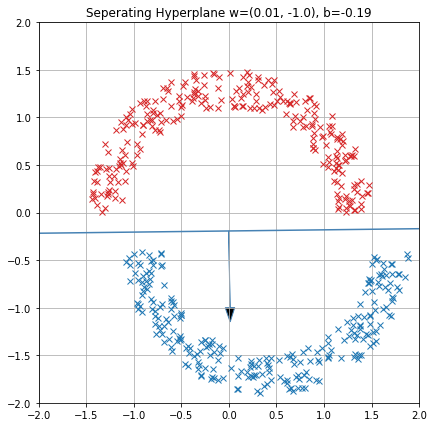

In [71]:
w, b = perceptron(T, s=s, epochs=epochs)
plot_annulus_classification(A0, A1, normed(w), b / norm(w))


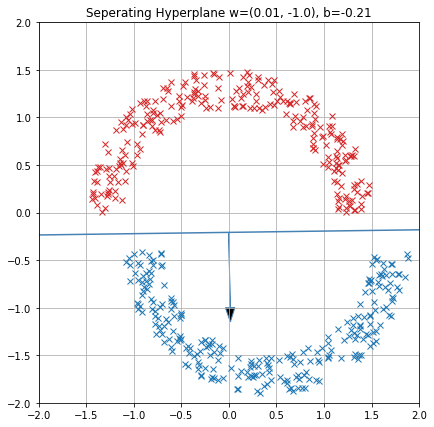

In [72]:
s, epochs = 0.01, 250
a, da = sigmoid, dx_sigmoid
a, da = linear, dx_linear
a, da = tanh, dx_tanh
a, da = lambda x: 0.5 * tanh(x) + 0.5, lambda x: 0.5 * dx_tanh(x)
a, da = lambda x: 0.5 * linear(x) + 0.5, lambda x: 0.5 * dx_linear(x)

w, b = delta_rule(T, a=a, da=da, s=s, epochs=epochs)
plot_annulus_classification(A0, A1, normed(w), b / norm(w))
